# Parte I: Regresión Lineal con Una Variable
## Modelado de Luminosidad Estelar

En este notebook implementamos regresión lineal desde cero para modelar la luminosidad estelar en función de la masa.

**Modelo:** $\hat{L} = w \cdot M + b$

- $M$: Masa estelar (en masas solares, $M_\odot$)
- $L$: Luminosidad estelar (en luminosidades solares, $L_\odot$)
- $w$: Peso (pendiente)
- $b$: Sesgo (intercepto)

## 1. Setup e Importación de Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Configuración de gráficas
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

## 2. Definición del Dataset

Datos de 10 estrellas con su masa (M) y luminosidad (L) observada.

In [2]:
# Dataset: Masa (M) en masas solares, Luminosidad (L) en luminosidades solares
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

m = len(M)  # Número de ejemplos
print(f"Número de ejemplos: {m}")
print(f"\nMasa (M): {M}")
print(f"Luminosidad (L): {L}")

Número de ejemplos: 10

Masa (M): [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
Luminosidad (L): [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


## 3. Visualización del Dataset

Graficamos M vs L para observar la relación entre masa y luminosidad.

C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9737 (\N{SUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


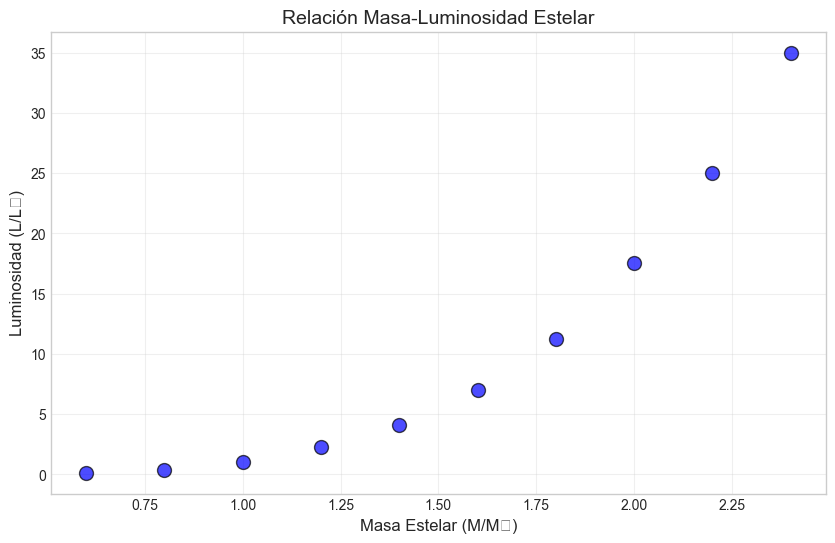

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(M, L, s=100, c='blue', edgecolors='black', alpha=0.7)
plt.xlabel('Masa Estelar (M/M☉)', fontsize=12)
plt.ylabel('Luminosidad (L/L☉)', fontsize=12)
plt.title('Relación Masa-Luminosidad Estelar', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

### Comentario sobre la Linealidad

**Observación:** La relación entre M y L **no es lineal**. Los datos muestran una curva creciente que aumenta más rápidamente a medida que la masa crece. Esto es consistente con la física estelar, donde la luminosidad escala aproximadamente con $M^{3.5}$ para estrellas de secuencia principal.

**Plausibilidad:** Los valores son físicamente plausibles:
- Una estrella con M=1.0 (como el Sol) tiene L≈1.0 ✓
- Estrellas más masivas son significativamente más luminosas ✓

## 4. Modelo y Función de Costo

### 4.1 Función de Predicción (Hipótesis)

$$\hat{L} = w \cdot M + b$$

### 4.2 Función de Costo (Error Cuadrático Medio - MSE)

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{L}^{(i)} - L^{(i)})^2 = \frac{1}{2m} \sum_{i=1}^{m} (w \cdot M^{(i)} + b - L^{(i)})^2$$

In [4]:
def predict(M, w, b):
    """
    Calcula las predicciones L_hat = w * M + b
    
    Args:
        M: array de masas
        w: peso (pendiente)
        b: sesgo (intercepto)
    
    Returns:
        L_hat: predicciones de luminosidad
    """
    return w * M + b


def compute_cost(M, L, w, b):
    """
    Calcula el costo (MSE) J(w, b)
    
    Args:
        M: array de masas
        L: array de luminosidades reales
        w: peso
        b: sesgo
    
    Returns:
        J: costo (escalar)
    """
    m = len(M)
    L_hat = predict(M, w, b)
    errors = L_hat - L
    J = (1 / (2 * m)) * np.sum(errors ** 2)
    return J


# Test con w=0, b=0
J_test = compute_cost(M, L, w=0, b=0)
print(f"Costo con w=0, b=0: J = {J_test:.4f}")

Costo con w=0, b=0: J = 117.6968


## 5. Superficie de Costo (Obligatorio)

Visualizamos cómo cambia J(w, b) al variar los parámetros w y b.

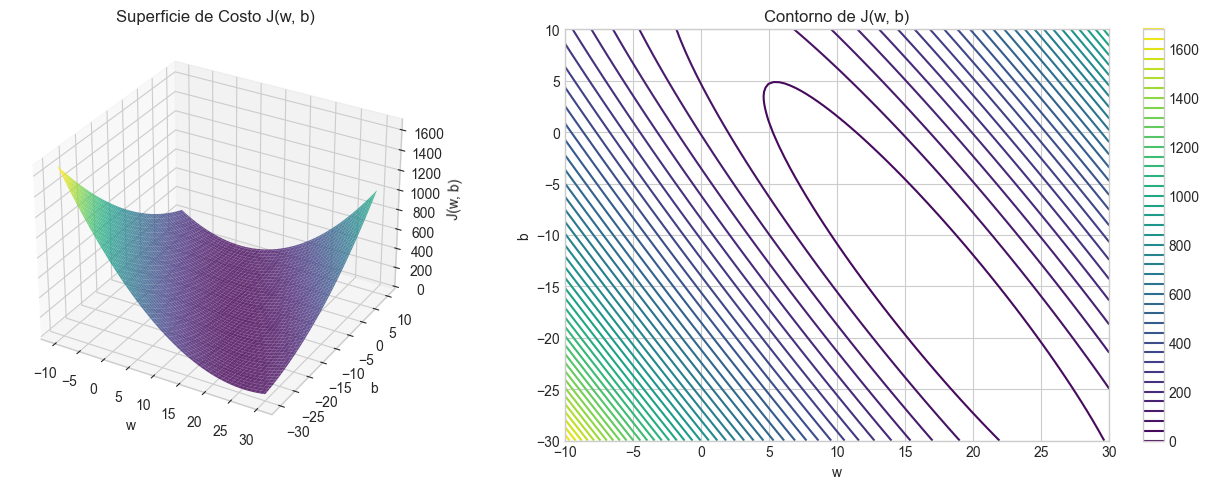

In [5]:
# Crear grilla de valores para w y b
w_range = np.linspace(-10, 30, 100)
b_range = np.linspace(-30, 10, 100)
W_grid, B_grid = np.meshgrid(w_range, b_range)

# Calcular J para cada combinación de (w, b)
J_grid = np.zeros_like(W_grid)
for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        J_grid[i, j] = compute_cost(M, L, W_grid[i, j], B_grid[i, j])

# Gráfica 3D
fig = plt.figure(figsize=(14, 5))

# Subplot 1: Superficie 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W_grid, B_grid, J_grid, cmap=cm.viridis, alpha=0.8)
ax1.set_xlabel('w')
ax1.set_ylabel('b')
ax1.set_zlabel('J(w, b)')
ax1.set_title('Superficie de Costo J(w, b)')

# Subplot 2: Contorno
ax2 = fig.add_subplot(122)
contour = ax2.contour(W_grid, B_grid, J_grid, levels=50, cmap=cm.viridis)
ax2.set_xlabel('w')
ax2.set_ylabel('b')
ax2.set_title('Contorno de J(w, b)')
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

### Interpretación de la Superficie de Costo

**¿Qué representa el mínimo?**

El mínimo de la superficie de costo representa los valores óptimos de $w$ y $b$ que minimizan el error cuadrático medio entre las predicciones y los valores reales de luminosidad. En este punto:

- El modelo tiene el mejor ajuste posible (dentro de las limitaciones del modelo lineal)
- Los gradientes son cero: $\frac{\partial J}{\partial w} = 0$ y $\frac{\partial J}{\partial b} = 0$
- Cualquier movimiento desde este punto aumenta el costo

## 6. Derivación e Implementación de Gradientes

### Derivación Matemática

Para $J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (w \cdot M^{(i)} + b - L^{(i)})^2$:

$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (w \cdot M^{(i)} + b - L^{(i)}) \cdot M^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (w \cdot M^{(i)} + b - L^{(i)})$$

## 7. Gradient Descent - Versión No Vectorizada (con loops)

In [6]:
def compute_gradients_loop(M, L, w, b):
    """
    Calcula gradientes usando loops explícitos (no vectorizado)
    
    Args:
        M: array de masas
        L: array de luminosidades reales
        w: peso actual
        b: sesgo actual
    
    Returns:
        dj_dw: gradiente respecto a w
        dj_db: gradiente respecto a b
    """
    m = len(M)
    dj_dw = 0.0
    dj_db = 0.0
    
    for i in range(m):
        L_hat_i = w * M[i] + b
        error_i = L_hat_i - L[i]
        dj_dw += error_i * M[i]
        dj_db += error_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db


def gradient_descent_loop(M, L, w_init, b_init, alpha, num_iterations):
    """
    Gradient descent usando gradientes calculados con loops
    
    Args:
        M: array de masas
        L: array de luminosidades
        w_init: peso inicial
        b_init: sesgo inicial
        alpha: learning rate
        num_iterations: número de iteraciones
    
    Returns:
        w: peso final
        b: sesgo final
        history: lista de costos por iteración
    """
    w = w_init
    b = b_init
    history = []
    
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients_loop(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(M, L, w, b)
        history.append(cost)
    
    return w, b, history


# Test de gradientes
dw_test, db_test = compute_gradients_loop(M, L, w=0, b=0)
print(f"Gradientes en w=0, b=0 (loop): dJ/dw = {dw_test:.4f}, dJ/db = {db_test:.4f}")

Gradientes en w=0, b=0 (loop): dJ/dw = -21.5230, dJ/db = -10.3600


## 8. Gradient Descent - Versión Vectorizada

In [7]:
def compute_gradients_vectorized(M, L, w, b):
    """
    Calcula gradientes usando vectorización NumPy (sin loops)
    
    Args:
        M: array de masas
        L: array de luminosidades reales
        w: peso actual
        b: sesgo actual
    
    Returns:
        dj_dw: gradiente respecto a w
        dj_db: gradiente respecto a b
    """
    m = len(M)
    L_hat = w * M + b  # Predicciones (vectorizado)
    errors = L_hat - L  # Errores (vectorizado)
    
    dj_dw = (1 / m) * np.sum(errors * M)  # Suma vectorizada
    dj_db = (1 / m) * np.sum(errors)      # Suma vectorizada
    
    return dj_dw, dj_db


def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    """
    Gradient descent usando gradientes vectorizados
    
    Args:
        M: array de masas
        L: array de luminosidades
        w_init: peso inicial
        b_init: sesgo inicial
        alpha: learning rate
        num_iterations: número de iteraciones
    
    Returns:
        w: peso final
        b: sesgo final
        history: lista de costos por iteración
    """
    w = w_init
    b = b_init
    history = []
    
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients_vectorized(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(M, L, w, b)
        history.append(cost)
    
    return w, b, history


# Verificar que ambas versiones dan el mismo resultado
dw_vec, db_vec = compute_gradients_vectorized(M, L, w=0, b=0)
print(f"Gradientes en w=0, b=0 (vectorizado): dJ/dw = {dw_vec:.4f}, dJ/db = {db_vec:.4f}")
print(f"\n✓ Ambas versiones dan el mismo resultado: {np.isclose(dw_test, dw_vec) and np.isclose(db_test, db_vec)}")

Gradientes en w=0, b=0 (vectorizado): dJ/dw = -21.5230, dJ/db = -10.3600

✓ Ambas versiones dan el mismo resultado: True


## 9. Convergencia (Obligatorio)

Entrenamos el modelo y graficamos el costo vs iteraciones.

In [8]:
# Parámetros de entrenamiento
w_init = 0.0
b_init = 0.0
alpha = 0.1  # Learning rate
num_iterations = 1000

# Entrenar con versión vectorizada
w_final, b_final, history = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)

print(f"Parámetros finales:")
print(f"  w = {w_final:.4f}")
print(f"  b = {b_final:.4f}")
print(f"  Costo final = {history[-1]:.4f}")

Parámetros finales:
  w = 18.1294
  b = -16.8340
  Costo final = 9.7951


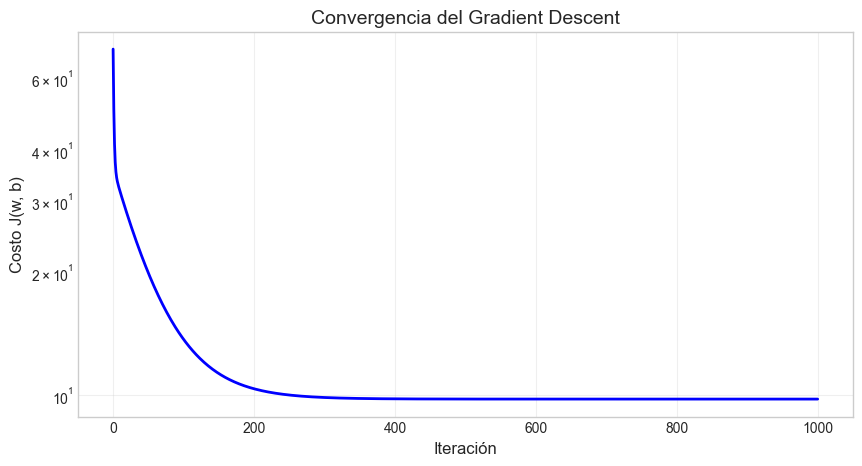

In [9]:
# Gráfica de convergencia
plt.figure(figsize=(10, 5))
plt.plot(history, 'b-', linewidth=2)
plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Costo J(w, b)', fontsize=12)
plt.title('Convergencia del Gradient Descent', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para ver mejor la convergencia
plt.show()

### Comentario sobre Convergencia

**Velocidad de convergencia:** El algoritmo converge rápidamente en las primeras iteraciones, donde el costo disminuye significativamente. Después de aproximadamente 200-300 iteraciones, los cambios son mínimos.

**Estabilidad:** Con $\alpha = 0.1$, el algoritmo es estable (el costo decrece monótonamente). Learning rates más altos podrían causar oscilaciones o divergencia.

## 10. Experimentos con Learning Rates (Obligatorio)

Comparamos el comportamiento con diferentes valores de $\alpha$.

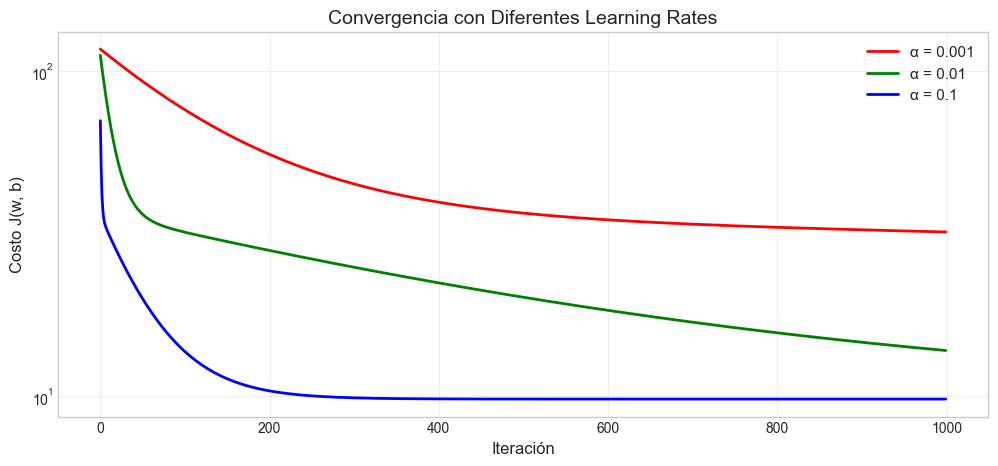


Learning Rate   w            b            Costo Final    
0.001           6.7738       1.5787       32.0267        
0.01            13.3648      -8.9395      13.8218        
0.1             18.1294      -16.8340     9.7951         


In [10]:
# Experimento con diferentes learning rates
learning_rates = [0.001, 0.01, 0.1]
colors = ['red', 'green', 'blue']
results = {}

plt.figure(figsize=(12, 5))

for alpha, color in zip(learning_rates, colors):
    w, b, hist = gradient_descent_vectorized(M, L, 0.0, 0.0, alpha, 1000)
    results[alpha] = {'w': w, 'b': b, 'final_cost': hist[-1]}
    plt.plot(hist, color=color, label=f'α = {alpha}', linewidth=2)

plt.xlabel('Iteración', fontsize=12)
plt.ylabel('Costo J(w, b)', fontsize=12)
plt.title('Convergencia con Diferentes Learning Rates', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

# Tabla de resultados
print("\n" + "="*60)
print(f"{'Learning Rate':<15} {'w':<12} {'b':<12} {'Costo Final':<15}")
print("="*60)
for alpha, res in results.items():
    print(f"{alpha:<15} {res['w']:<12.4f} {res['b']:<12.4f} {res['final_cost']:<15.4f}")
print("="*60)

### Análisis de Resultados

- **α = 0.001**: Convergencia muy lenta, puede requerir muchas más iteraciones para alcanzar el mínimo.
- **α = 0.01**: Buen balance entre velocidad y estabilidad.
- **α = 0.1**: Convergencia rápida. Valores más altos podrían causar inestabilidad.

## 11. Visualización del Ajuste Final

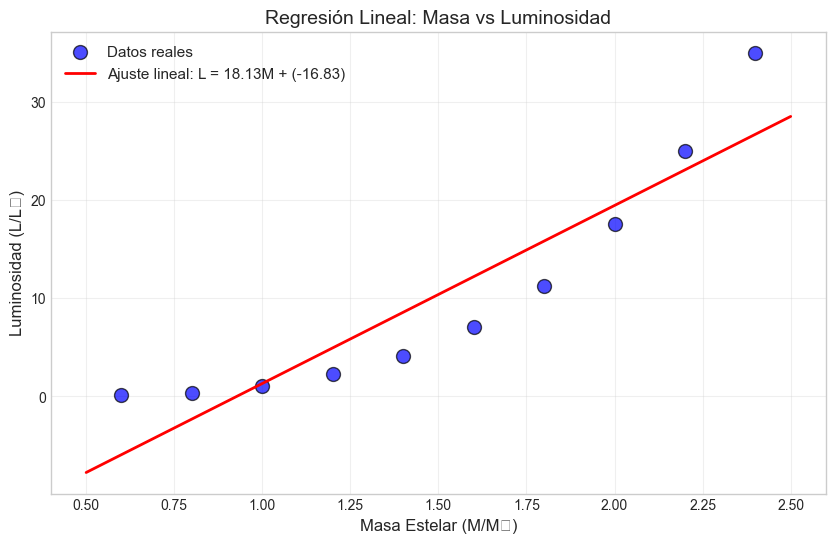

In [11]:
# Usar el mejor modelo (α = 0.1)
w_best = results[0.1]['w']
b_best = results[0.1]['b']

# Línea de regresión
M_line = np.linspace(0.5, 2.5, 100)
L_pred = predict(M_line, w_best, b_best)

plt.figure(figsize=(10, 6))
plt.scatter(M, L, s=100, c='blue', edgecolors='black', alpha=0.7, label='Datos reales')
plt.plot(M_line, L_pred, 'r-', linewidth=2, label=f'Ajuste lineal: L = {w_best:.2f}M + ({b_best:.2f})')
plt.xlabel('Masa Estelar (M/M☉)', fontsize=12)
plt.ylabel('Luminosidad (L/L☉)', fontsize=12)
plt.title('Regresión Lineal: Masa vs Luminosidad', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### Discusión de Errores Sistemáticos

El ajuste lineal muestra **errores sistemáticos claros**:

1. **Subestima** la luminosidad para masas bajas (M < 1.0) y altas (M > 2.0)
2. **Sobreestima** la luminosidad para masas intermedias

Esto indica que la relación real es **no lineal** (curva), lo que confirma la física estelar: $L \propto M^{3.5}$

## 12. Preguntas Conceptuales

### 12.1 Significado Astrofísico de w

El parámetro **w** representa la **tasa de cambio** de la luminosidad respecto a la masa. En términos físicos:

- Un valor de w ≈ 17-19 indica que, *en promedio*, por cada aumento de 1 masa solar, la luminosidad aumenta aproximadamente 17-19 luminosidades solares.
- Sin embargo, esto es una aproximación lineal de una relación que en realidad es potencial ($L \propto M^{3.5}$).

### 12.2 ¿Por qué es limitado el modelo lineal aquí?

El modelo lineal es **fundamentalmente limitado** porque:

1. **Física subyacente**: La relación masa-luminosidad para estrellas de secuencia principal sigue una ley de potencias: $L \approx M^{3.5}$, no una relación lineal.

2. **Errores sistemáticos**: Como se observa en la gráfica, el modelo lineal produce errores predecibles en diferentes rangos de masa.

3. **Naturaleza exponencial/potencial**: La luminosidad crece mucho más rápido que linealmente para estrellas más masivas, debido a las tasas de fusión nuclear que escalan de forma no lineal con la masa.

**Solución**: Usar regresión polinomial o transformar los datos (ej: log(L) vs log(M)) para capturar la verdadera relación.